## This Notebook is is for Module 1 Discussion:

#### Download the train.csv dataset and run some basic descriptive statistics and graphs for two or more variables of your choosing using Python.  Provide your Python code here, perhaps as a Jupyter notebook .html file on GitHub.  Embed at least one graph in your discussion by using the "Files" link in the upper right portion of Canvas.


### Let's read in our data and import some modules


In [42]:
#Necessary modules and data
import pandas as pd
import seaborn as sns
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/train.csv")

### Let's do some exploring
 From this EDA we can see that there was a family with 9 children aboard! wow I can't even imagine. Here's an article about them: 
 http://titanicgazette.blogspot.com/2009/06/biggest-family-on-titanic.html

 I am never a fan of boolean categories and Ordinal fields when building charts, lets label survived and the Ticket Class. I also am paranoid about modifying the data so I always copy to a separate object; this might be problematic for larger datasets so I'll have to get over that fear.
 


In [66]:
#Just a few descriptives

display(data.shape)
#891 observations, 12 columns/attributes
display(data.describe())
#It looks like we only have a few numeric attributes. 
##PassengerID is an index.
##Survived is binary attribute (0 or 1)
##Pclass looks categorical/ordinal: 1,2,3 
#SibSp and Parch discrete numerics.
#Ticket is apperas to be grouped by unique purchases; family belongs on same ticket


display(data.sort_values(by =['SibSp'], ascending=False)[0:9])

# Initialize a copy dataframe to add some categories
augmented = data.copy()

augmented['Status'] = np.where(augmented['Survived'] ==1 , 'Survived', 'Perished')
augmented['ClassCategory'] = np.where(augmented.Pclass == 1, '1st', 
                                 np.where(augmented.Pclass == 2, '2nd', '3rd'))


(891, 12)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S


### Here are the first 5 rows of our new augmented dataset.

In [6]:
augmented[0:5]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,ClassCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Perished,3rd
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,1st
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,3rd
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,1st
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Perished,3rd


### Quickly let's explore where people departed from and the Class Category of the tickets which they bought while also viewing if they perished or survived (their outcomes)
    1) A higher proportion of those leaving from S perished.
    2) A higher proportion of individuals in 3rd Class perished.
    3) When comparing across the sexes it looks like the mean age of women was lower for the individuals who perished relative to those who survived.


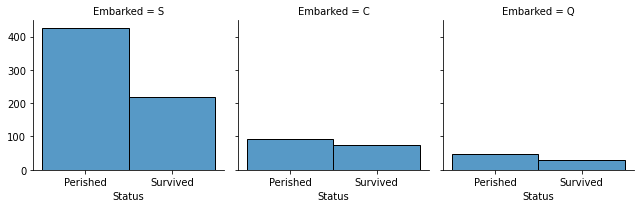

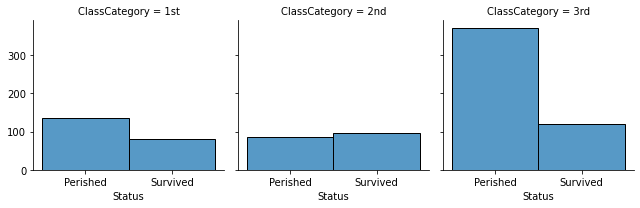

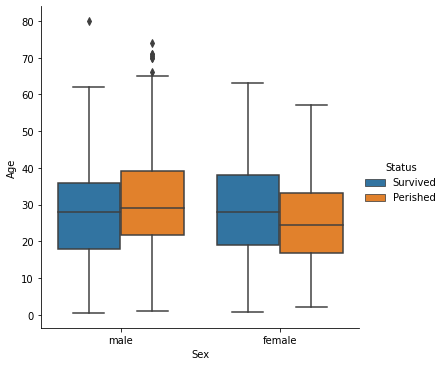

In [8]:
# Embarked few histograms
Embarked_grid = sns.FacetGrid(augmented, col="Embarked", margin_titles=True)
Embarked_grid.map(sns.histplot, "Status")


augmented.sort_values(by =['ClassCategory'], ascending=True, inplace=True)
class_grid = sns.FacetGrid(augmented, col="ClassCategory")
class_grid.map(sns.histplot, "Status")



sns.catplot(x="Sex", y="Age", hue="Status",
               data=augmented, kind="box")


### Arbitrarily I wanted to view some crude age groupings and look at the proportions of those who survived in those groupings. 
    4) Children look to have better odds.


In [23]:
Older = augmented[augmented['Age']>60]
pOld = sum(Older['Survived'])/Older.shape[0]

Minors = augmented[augmented['Age']<18]
pMinor = sum(Minors['Survived'])/Minors.shape[0]

AgeAdult = augmented[augmented['Age']>18]
Age18_60 = AgeAdult[AgeAdult['Age']<60]

pAge18_60 = sum(Age18_60['Survived'])/Age18_60.shape[0]

props = {'Age60+': pOld, '18<Age>60': pAge18_60, 'Age<18': pMinor}

Sprops = pd.Series(props)



<AxesSubplot:ylabel='Survival Proportion'>

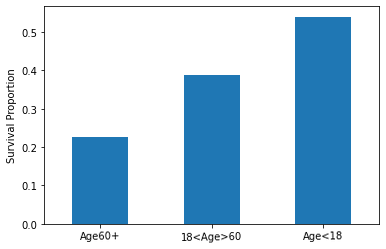

In [24]:
Sprops.plot.bar(rot=1, ylabel="Survival Proportion")

### Depending on your opinion these cumulative proportion charts are terrible or great.
    5) The top chart is attempting to show that there are very few if any passengers in first class who are young; there age curves look very similar across the facet for first class but not the other two two classes.
    6) The bottom chart is attemption to show that male children are the single group of passengers which were more likely than their female counterparts to survive from a propional basis.

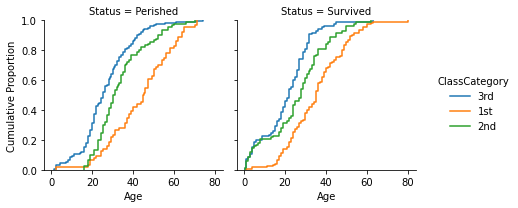

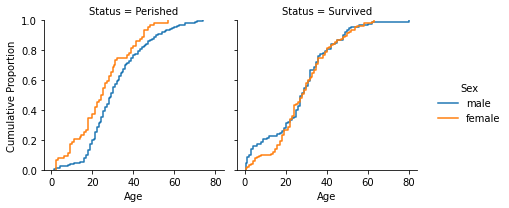

In [67]:

#sns.ecdfplot(data=augmented, x="Age", hue="ClassCategory", stat="proportion")
ClassProportion_grid = sns.FacetGrid(augmented, col="Status",hue="ClassCategory", margin_titles=True)
ClassProportion_grid.map(sns.ecdfplot,"Age")
ClassProportion_grid.add_legend()
ClassProportion_grid.set_axis_labels("Age", "Cumulative Proportion")


SexProportion_grid = sns.FacetGrid(augmented, col="Status",hue="Sex", margin_titles=True)
SexProportion_grid.map(sns.ecdfplot,"Age")
SexProportion_grid.add_legend()
SexProportion_grid.set_axis_labels("Age", "Cumulative Proportion")



### Just exploring where the age/fare groupings are!
    7) There's a cluster of high fare payers.

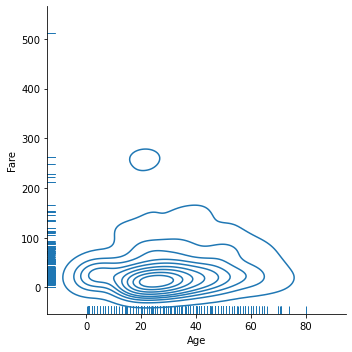

In [10]:
print('It appears there is a cluster of passengers with large fares)
sns.displot(augmented, x="Age", y="Fare",kind="kde", rug=True)

In [65]:
TopFares = augmented[augmented['Fare']>200]

PTopFares=sum(TopFares['Survived'])/TopFares.shape[0]

TopFares

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,ClassCategory
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Perished,1st
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Survived,1st
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,Perished,1st
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Survived,1st
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,Survived,1st
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Survived,1st
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Survived,1st
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,Perished,1st
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,Survived,1st
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Perished,1st


### Let's look at the NaN/Null ages group of passengers
    8) The missing ages look to occur at similar status and sex to the rest of the training set proportionally.

Text(0.5, 0.98, 'Training Data by Sex and Status')

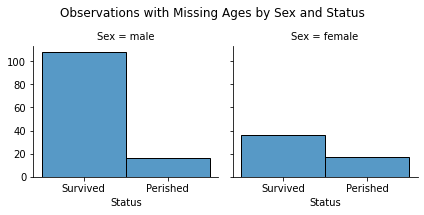

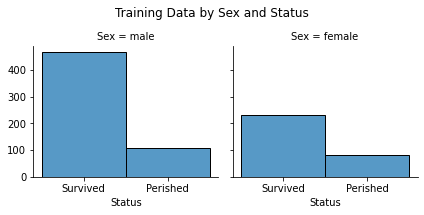

In [62]:
#looking at the missing ages


NoAges = augmented[augmented['Age'].isnull()]
NoAges_grid = sns.FacetGrid(NoAges, col="Sex", margin_titles=True)
NoAges_grid.map(sns.histplot, "Status")

plt.subplots_adjust(top=0.8)
plt.suptitle("Observations with Missing Ages by Sex and Status")


class_grid = sns.FacetGrid(augmented, col="Sex")
class_grid.map(sns.histplot, "Status")

plt.subplots_adjust(top=0.8)
plt.suptitle("Training Data by Sex and Status")




### Looking at Sex
    9) Women were more likely to survive on a whole

<AxesSubplot:ylabel='Survival Proportion'>

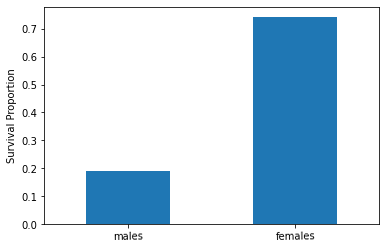

In [33]:
females = augmented[augmented['Sex'] =='female']
pFem = sum(females['Survived'])/females.shape[0]

males = augmented[augmented['Sex'] == 'male' ]
pMal = sum(males['Survived'])/males.shape[0]

GProps= {'males': pMal, 'females': pFem}

GSeries = pd.Series(GProps)

GSeries.plot.bar(rot=1, ylabel="Survival Proportion")

### I was going to build some grouped summary statistics tables, but I ran out of time

I hope you enjoyed this exploration

In [7]:
str(round(sum(augmented.Survived)/augmented.shape[0]*100,2))+'%% of passengers perished'

summaries = augmented.groupby(['Sex', 'Pclass'])
